In [1]:
#importing libraries
from tensorflow import keras
import pandas  as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
# Reading csv
data = pd.read_csv("MicrosoftStock.csv")

In [3]:
data

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [4]:
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [6]:
data.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


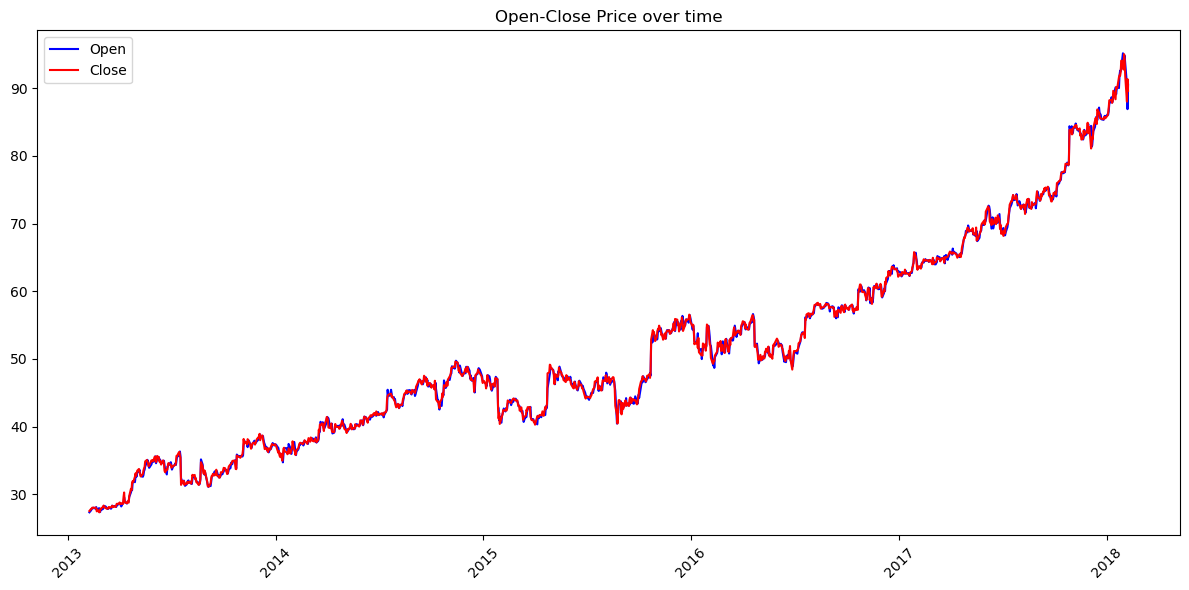

In [28]:
# Initial data visualization
# plot 1- open and close prices of time

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['open'], label="Open", color="blue")
plt.plot(data['date'], data['close'], label="Close", color="red")
plt.title("Open-Close Price over time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

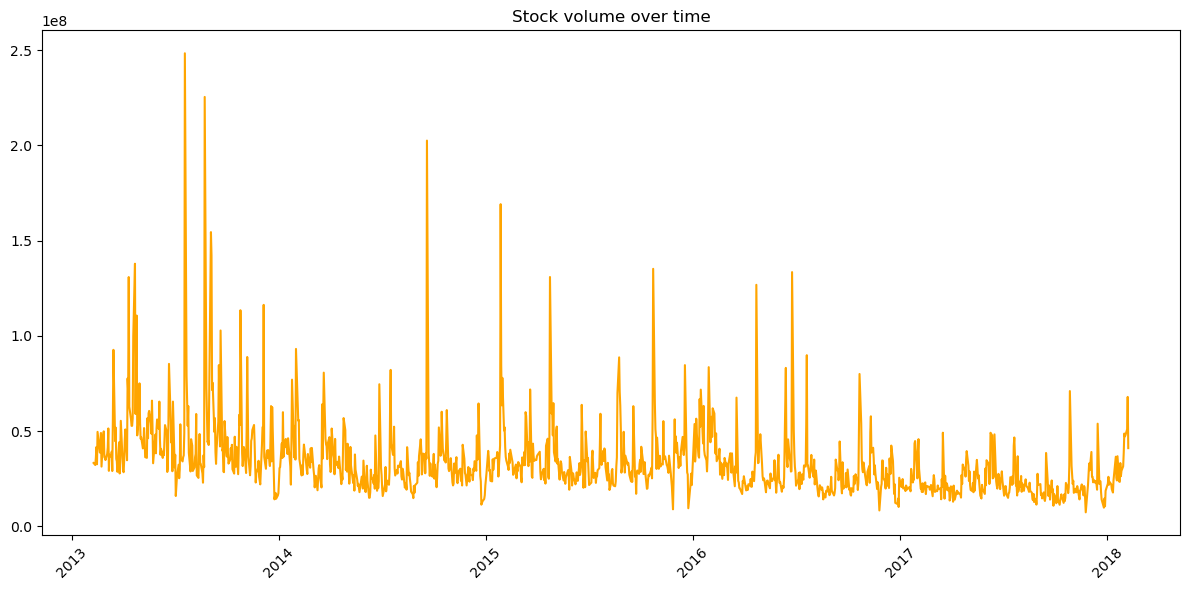

In [29]:
# plot 2 - Tranding volume (checking for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['volume'], label="Volume", color="orange")
plt.title("Stock volume over time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [9]:
# Dropping non-numeric data
numeric_data = data.select_dtypes(include=["int64", "float64"])

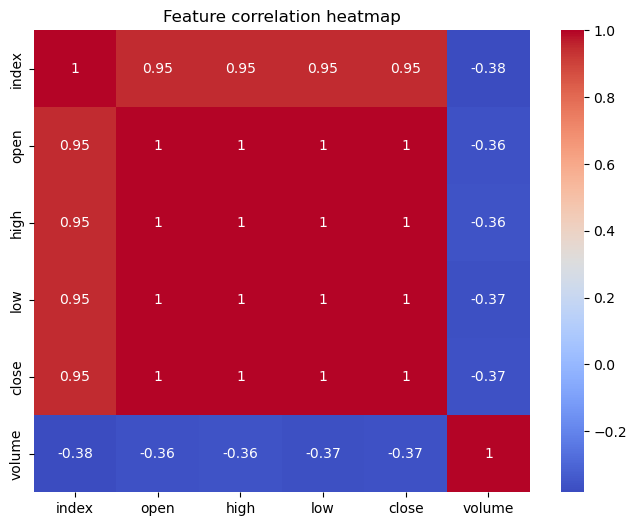

In [10]:
# plot 3- checking for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

In [11]:
# Converting the date into date time then creating a date filter
data['date'] = pd.to_datetime(data['date'])

In [12]:
prediction = data.loc[
    (data['date'] > datetime(2013,1,1)) &
    (data['date'] < datetime(2018,1,1))
]

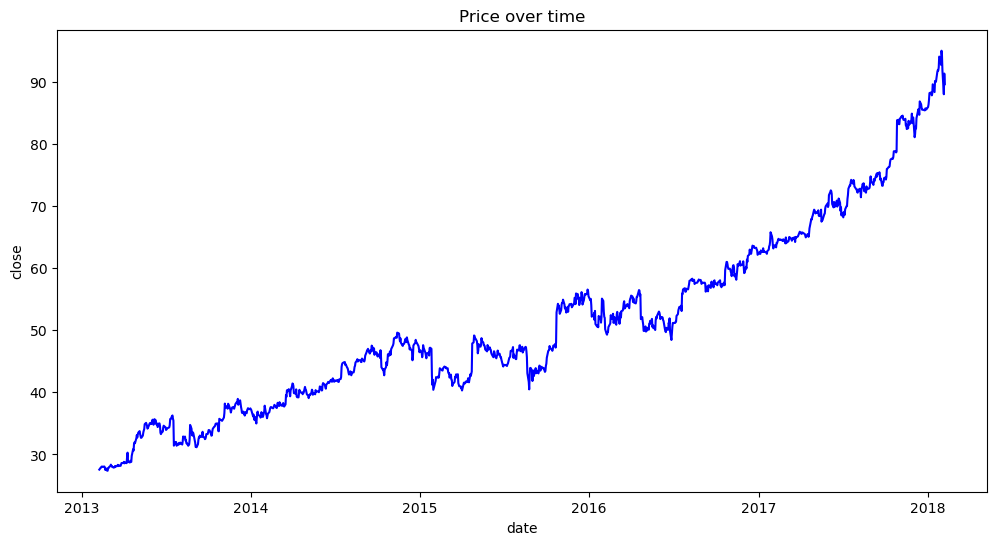

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], color="blue")
plt.xlabel("date")
plt.ylabel("close")
plt.title("Price over time")
plt.show()

In [14]:
# Prepare for the LSTM Model (Sequential)
stock_close = data.filter(['close'])
dataset = stock_close.values # converting to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [15]:
# preprocessing stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len]  # 95% of all our data

X_train, Y_train = [], []

#Creating a sciliding window for our stocks
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Building the model
model = keras.models.Sequential()

In [17]:
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [18]:
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

In [19]:
# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

In [20]:
# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

In [21]:
# Final Output Layer
model.add(keras.layers.Dense(1))

In [22]:
model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________


In [23]:
training = model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
36/36 [==============================] - 6s 44ms/step - loss: 0.2412 - root_mean_squared_error: 0.3614
Epoch 2/20
36/36 [==============================] - 1s 39ms/step - loss: 0.1298 - root_mean_squared_error: 0.1795
Epoch 3/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1137 - root_mean_squared_error: 0.1546
Epoch 4/20
36/36 [==============================] - 1s 39ms/step - loss: 0.1160 - root_mean_squared_error: 0.1574
Epoch 5/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1134 - root_mean_squared_error: 0.1512
Epoch 6/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1087 - root_mean_squared_error: 0.1471
Epoch 7/20
36/36 [==============================] - 2s 44ms/step - loss: 0.1053 - root_mean_squared_error: 0.1414
Epoch 8/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1049 - root_mean_squared_error: 0.1448
Epoch 9/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1057 - root_m

In [24]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, Y_test = [], dataset[training_data_len:]

In [25]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [26]:
# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 27ms/step


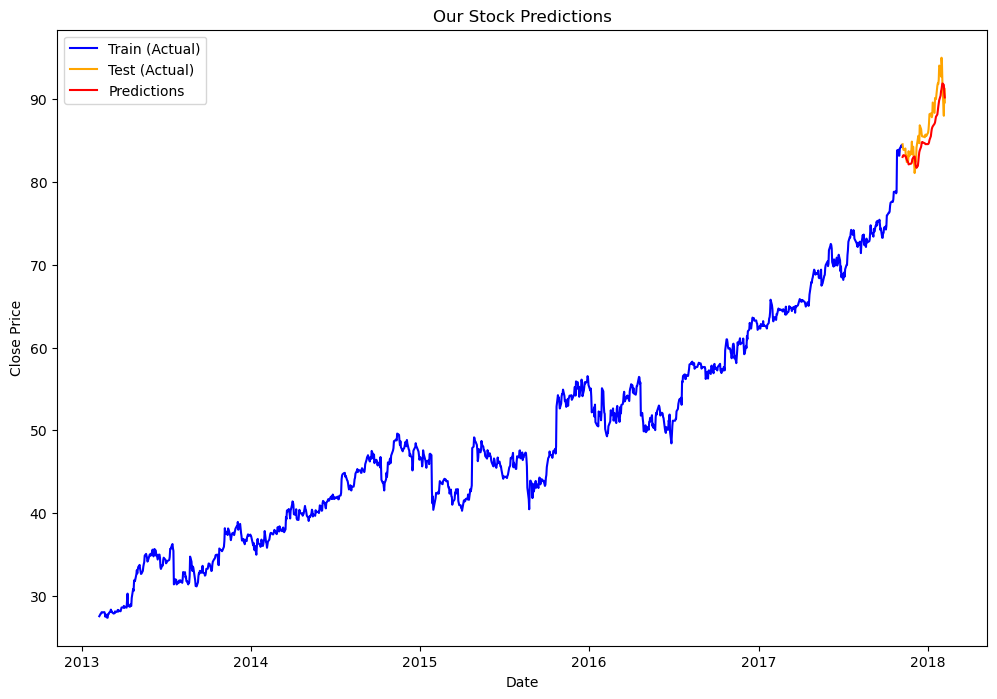

In [27]:
# Plotting data
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()